[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  1 of 1 completed


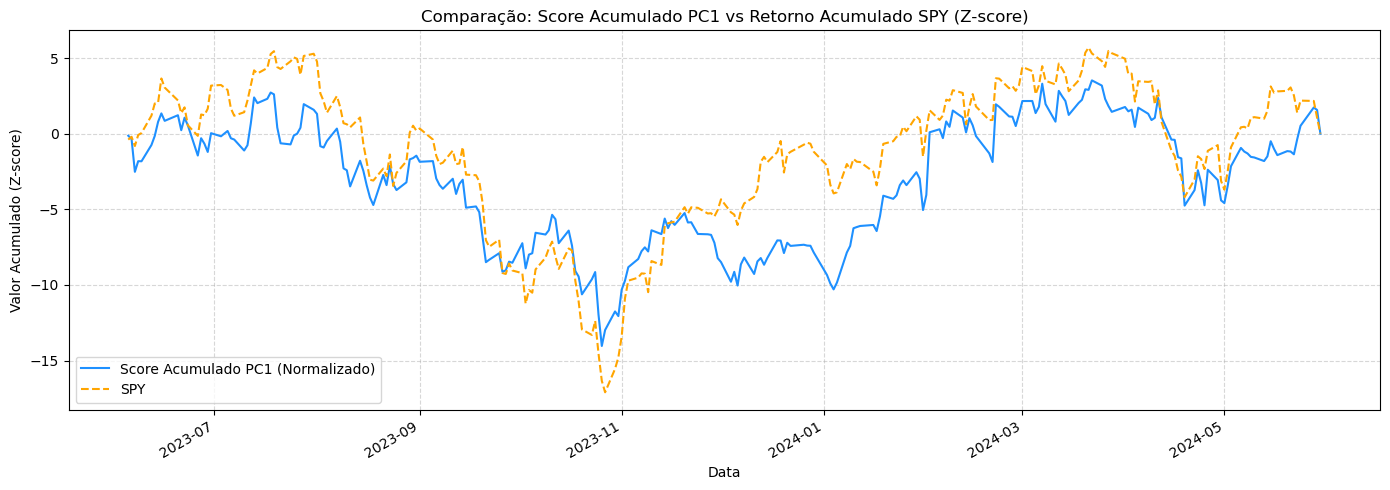

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1. Definir lista de tickers das ações
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'NVDA', 'JPM', 'UNH', 'V', 'XOM']

# 2. Baixar preços ajustados das ações para o período desejado
precos = yf.download(tickers, start='2023-06-01', end='2024-06-01', auto_adjust=True)['Close']

# 3. Calcular log-retornos diários das ações
retornos = np.log(precos / precos.shift(1)).dropna()

# 4. Baixar preços ajustados do SPY no mesmo período
spy = yf.download('SPY', start=retornos.index.min(), end=retornos.index.max(), auto_adjust=True)['Close']

# 5. Calcular log-retorno diário do SPY
retornos_spy = np.log(spy / spy.shift(1)).dropna()

# 6. Alinhar índices das datas (interseção)
datas_comuns = retornos.index.intersection(retornos_spy.index)
retornos = retornos.loc[datas_comuns]
retornos_spy = retornos_spy.loc[datas_comuns]

# 7. Aplicar PCA nos retornos das ações
pca = PCA()
pca.fit(retornos)
scores = pd.DataFrame(pca.transform(retornos), index=retornos.index, columns=[f'PC{i+1}' for i in range(retornos.shape[1])])

# 8. Normalizar PC1 e retorno do SPY para comparar
pc1_score = scores['PC1']
pc1_score_norm = (pc1_score - pc1_score.mean()) / pc1_score.std()
spy_ret_norm = (retornos_spy - retornos_spy.mean()) / retornos_spy.std()

# 9. Acumular para visualizar a evolução ao longo do tempo
pc1_acumulado = pc1_score_norm.cumsum()
spy_acumulado = spy_ret_norm.cumsum()

# 10 Plotar os dois no mesmo gráfico
plt.figure(figsize=(14, 5))
ax = plt.gca()  # pega o eixo atual

pc1_acumulado.plot(ax=ax, label='Score Acumulado PC1 (Normalizado)', color='dodgerblue')
spy_acumulado.plot(ax=ax, label='Retorno Acumulado SPY (Normalizado)', color='orange', linestyle='--')

plt.title('Comparação: Score Acumulado PC1 vs Retorno Acumulado SPY (Z-score)')
plt.xlabel('Data')
plt.ylabel('Valor Acumulado (Z-score)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
